In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

In [14]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

print('Train: ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test', X_test.shape, y_test.shape)

Train:  (75, 4) (75,)
Validation: (37, 4) (37,)
Test (38, 4) (38,)


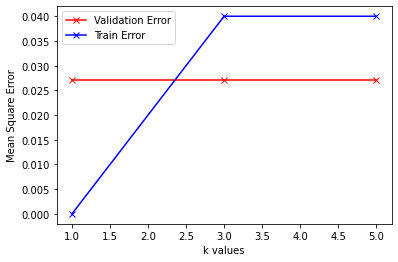

In [28]:
classifiers = []
k_values = range(1,6,2)
val_pred_errors = []
train_errors = []
preds = []
for n in k_values:
    classifier = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)
    
    y_val_pred = classifier.predict(X_val)
    preds.append(y_val_pred)
    cm = confusion_matrix(y_val, y_val_pred)
#     print(cm)
    val_pred_error = mean_squared_error(y_val, y_val_pred)
    val_pred_errors.append(val_pred_error)
    
    train_error = mean_squared_error(y_train, classifier.predict(X_train))
    train_errors.append(train_error)
    
plt.plot(k_values, val_pred_errors, color='red', marker='x')
plt.plot(k_values, train_errors, color='blue', marker='x')
plt.xlabel('k values')
plt.ylabel('Mean Square Error')
plt.legend(('Validation Error', 'Train Error'))
plt.show()

In [29]:
tuned_parameters = [{'algorithm': ['auto'], 'n_neighbors': range(1,16)}]
scores = ['accuracy']


clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
          print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Best Parameter Observed : ")
print("_" *30)
print()
print(clf.best_params_)
print()

0.933 (+/-0.122) for {'algorithm': 'auto', 'n_neighbors': 1}
0.897 (+/-0.129) for {'algorithm': 'auto', 'n_neighbors': 2}
0.921 (+/-0.101) for {'algorithm': 'auto', 'n_neighbors': 3}
0.950 (+/-0.092) for {'algorithm': 'auto', 'n_neighbors': 4}
0.949 (+/-0.099) for {'algorithm': 'auto', 'n_neighbors': 5}
0.937 (+/-0.137) for {'algorithm': 'auto', 'n_neighbors': 6}
0.948 (+/-0.102) for {'algorithm': 'auto', 'n_neighbors': 7}
0.924 (+/-0.145) for {'algorithm': 'auto', 'n_neighbors': 8}
0.936 (+/-0.117) for {'algorithm': 'auto', 'n_neighbors': 9}
0.924 (+/-0.145) for {'algorithm': 'auto', 'n_neighbors': 10}
0.950 (+/-0.092) for {'algorithm': 'auto', 'n_neighbors': 11}
0.936 (+/-0.078) for {'algorithm': 'auto', 'n_neighbors': 12}
0.937 (+/-0.115) for {'algorithm': 'auto', 'n_neighbors': 13}
0.924 (+/-0.124) for {'algorithm': 'auto', 'n_neighbors': 14}
0.911 (+/-0.100) for {'algorithm': 'auto', 'n_neighbors': 15}

Best Parameter Observed : 
______________________________

{'algorithm': 'auto

In [30]:
# win_clf = classifiers[1]
for clf in classifiers:
    y_pred_test = clf.predict(X_test)
    cm = confusion_matrix(y_val, y_val_pred)
    test_pred_error = mean_squared_error(y_test, y_pred_test)
#     print(clf.n_neighbors)
    print('Confusion Matrix for k = {}' .format(clf.n_neighbors))
    print(cm)
    print()
    print('Test Error for k = {}' .format(clf.n_neighbors))
    print(test_pred_error)
    print()

Confusion Matrix for k = 1
[[14  0  0]
 [ 0  9  0]
 [ 0  1 13]]

Test Error for k = 1
0.07894736842105263

Confusion Matrix for k = 3
[[14  0  0]
 [ 0  9  0]
 [ 0  1 13]]

Test Error for k = 3
0.02631578947368421

Confusion Matrix for k = 5
[[14  0  0]
 [ 0  9  0]
 [ 0  1 13]]

Test Error for k = 5
0.02631578947368421



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
kf = KFold(n_splits=5,shuffle=True)

train_accuracies = []
test_accuracies = []

for k in k_values:  
    print("_" *60)
    print("K-Value: "+ str(k))
    model_knn = KNeighborsClassifier(n_neighbors=k)
    
    test_acc_e= []
    scores_e = []
    for train_index, test_index in kf.split(X_train):
        X_train_e, X_test_e, y_train_e, y_test_e = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
        model_e = model_knn.fit(X_train_e,y_train_e)
        pred_e = model_e.predict(X_test_e)
        testacc_e = accuracy_score(y_test_e, pred_e)
        test_acc_e.append(testacc_e)
        
        scores_e.append(model_e.score(X_test_e,y_test_e))
    print("Mean Test Accuracies " , np.mean(test_acc_e))
    print("Average error :  ", (1-np.mean(scores_e)))

____________________________________________________________
K-Value: 1
Mean Test Accuracies  0.9375494071146244
Average error :   0.06245059288537558
____________________________________________________________
K-Value: 3
Mean Test Accuracies  0.9288537549407115
Average error :   0.07114624505928846
____________________________________________________________
K-Value: 5
Mean Test Accuracies  0.9462450592885375
Average error :   0.05375494071146247
